In [ ]:
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt

# Descargar datos históricos para los tickers
tickers = ["AAPL", "GOOGL"]
start_date = "2022-12-31"
end_date = "2023-10-23"

datatickers = yf.download(tickers, start=start_date, end=end_date)['Adj Close']
datatickers

[*********************100%%**********************]  2 of 2 completed


,AAPL,GOOGL
Date,,
2023-01-03,124.538658,89.120003
2023-01-04,125.823189,88.080002
2023-01-05,124.488876,86.199997
2023-01-06,129.069321,87.339996
2023-01-09,129.597061,88.019997
...,...,...
2023-10-16,178.720001,139.100006
2023-10-17,177.149994,139.720001
2023-10-18,175.839996,137.960007


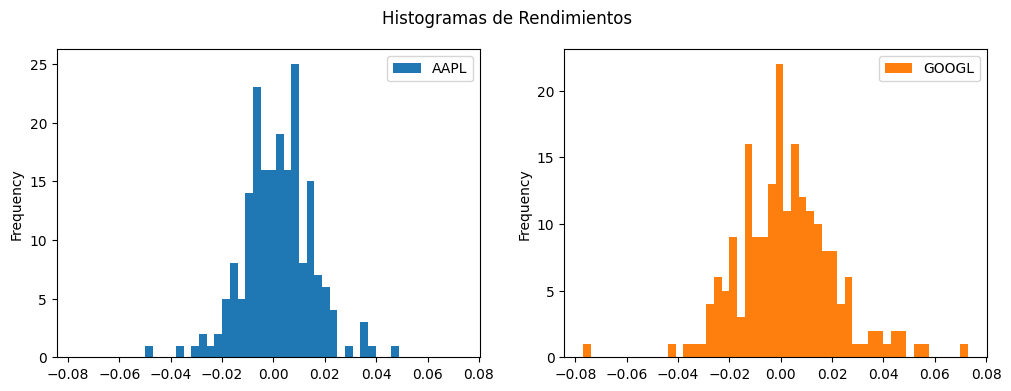

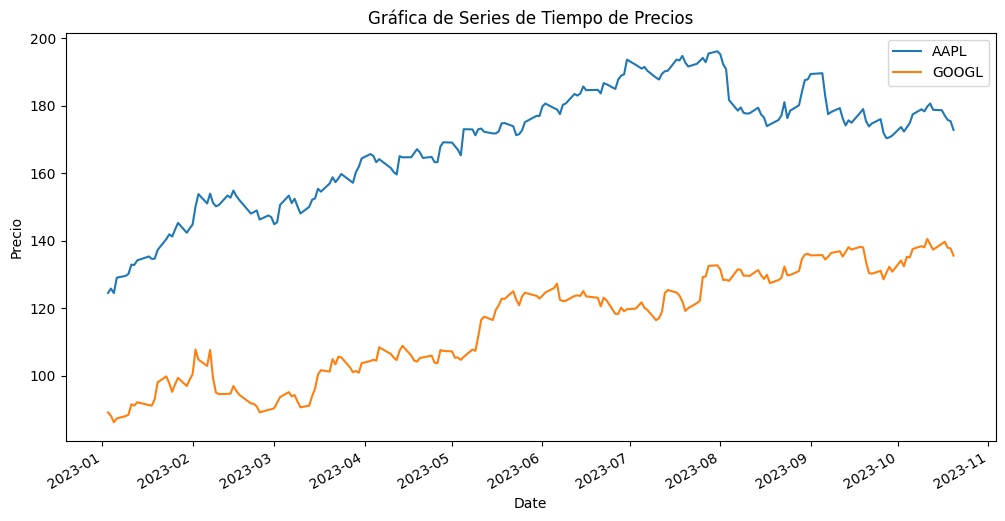

             AAPL       GOOGL
count  201.000000  201.000000
mean     0.001719    0.002270
std      0.013123    0.019046
min     -0.048020   -0.076830
25%     -0.006581   -0.009649
50%      0.001797    0.000855
75%      0.008846    0.012667
max      0.046927    0.072787


In [ ]:
# Calcular rendimientos
rendimientosT = datatickers.pct_change().dropna()

# Análisis estadístico descriptivo
estadisticas = rendimientosT.describe()

# Histogramas de los rendimientos
rendimientosT.plot.hist(subplots=True, layout=(1, 2), bins=50, figsize=(12, 4))
plt.suptitle("Histogramas de Rendimientos")

# Gráficas de series de tiempo
datatickers.plot(figsize=(12, 6))
plt.title("Gráfica de Series de Tiempo de Precios")
plt.ylabel("Precio")

# Mostrar las gráficas
plt.show()

# Imprimir estadísticas descriptivas
print(estadisticas)

In [ ]:
# Calcular rendimientos
rendimientosT = datatickers.pct_change().dropna()
print (rendimientosT)

# Calcular las desviaciones estadísticas
media_rendimientosT = rendimientosT.mean()
desviacionesT = (rendimientosT - media_rendimientosT) ** 2

# Calcular la volatilidad del portafolio
volatilidadT = desviacionesT.mean() ** 0.5

# Imprimir la volatilidad
print("Volatilidad del portafolio:", volatilidadT)

volatilidad_anualizadaT = volatilidadT * (201 ** 0.5)

# Imprimir la volatilidad anualizada
print("Volatilidad anualizada del portafolio:", volatilidad_anualizadaT)

# Calcular rendimientos compuestos
rendimiento_compuestoT = (rendimientosT + 1).prod() - 1
rendimiento_compuestoT
# Imprimir el resultado
print("Rendimiento compuesto:", rendimiento_compuestoT)


# Anualizar los rendimientos
periodos_por_anioT = 201  # Sabiendo que tienes datos mensuales
rendimientos_anualizadosT = rendimiento_compuestoT * periodos_por_anioT

print (rendimientos_anualizadosT)

                AAPL     GOOGL
Date                          
2023-01-04  0.010314 -0.011670
2023-01-05 -0.010605 -0.021344
2023-01-06  0.036794  0.013225
2023-01-09  0.004089  0.007786
2023-01-10  0.004456  0.004544
...              ...       ...
2023-10-16 -0.000727  0.012667
2023-10-17 -0.008785  0.004457
2023-10-18 -0.007395 -0.012597
2023-10-19 -0.002161 -0.001522
2023-10-20 -0.014704 -0.015608

[201 rows x 2 columns]
Volatilidad del portafolio: AAPL     0.013091
GOOGL    0.018998
dtype: float64
Volatilidad anualizada del portafolio: AAPL     0.185591
GOOGL    0.269345
dtype: float64
Rendimiento compuesto: AAPL     0.388163
GOOGL    0.521544
dtype: float64
AAPL      78.020840
GOOGL    104.830345
dtype: float64
